In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
data_file = 'CreditCard_data.csv'
X = pd.read_csv(data_file)

In [11]:
X

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [12]:
X = X.drop('CUST_ID', axis = 1)

In [13]:
X.fillna(method = 'ffill', inplace = True)

In [15]:
type(X)

pandas.core.frame.DataFrame

In [17]:
X.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
scaler = StandardScaler()

In [19]:
X_scaled = scaler.fit_transform(X)

In [33]:
X_normalized = normalize(X_scaled)

In [34]:
X_normalized = pd.DataFrame(X_normalised)

In [35]:
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


## PCA(Principle Component Analyses)
It is a statistical procedure that uses an (othodonal) transformation which converts a set of correlated variables to a set of uncorrelated variables.

It is widely used tool in exploratory data analisis and in ML predictive models

Is an unsupervised statistical technique used to examine the interrelations among a set of variables

In [64]:
# Reducing the dimensionality of data
pca = PCA(svd_solver = 'full',n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [67]:
X_principal.head(10)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268879
3,-0.481656,-0.097611
4,-0.563512,-0.482506
5,0.336076,-0.235098
6,0.756178,0.388880
7,0.576473,-0.261946
8,-0.185031,-0.254403
9,-0.217363,-0.124388


In [79]:
ac2 = AgglomerativeClustering(n_clusters = 2)
y_pred2 = ac2.fit_predict(X_principal)

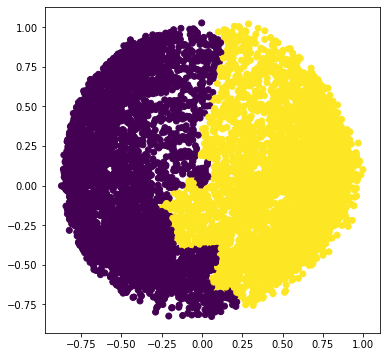

In [83]:
#Vizaualization the Clustering
plt.figure(figsize = (6,6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = y_pred2 )
plt.show()


In [81]:
ac3 = AgglomerativeClustering(n_clusters = 3)

In [82]:
y_pred3 = ac3.fit_predict(X_principal)

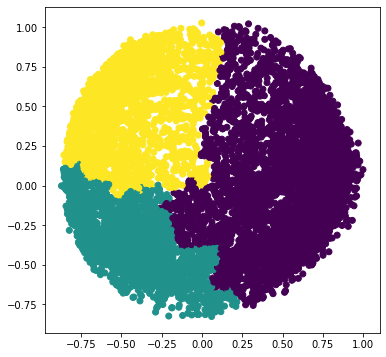

In [86]:
plt.figure(figsize = (6,6))
plt.scatter(X_principal['P1'], X_principal['P2'], c =y_pred3 )

In [87]:
ac4 = AgglomerativeClustering(n_clusters = 4)

In [88]:
y_pred4 = ac4.fit_predict(X_principal)

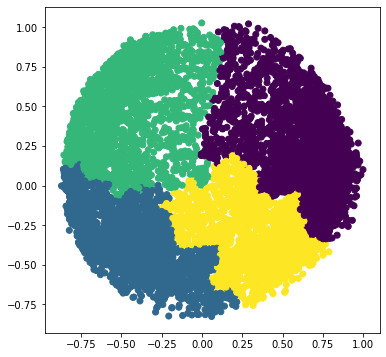

In [90]:
plt.figure(figsize = (6,6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = y_pred4)
plt.show()

In [91]:
ac5 = AgglomerativeClustering(n_clusters = 5)

In [92]:
y_pred5 = ac5.fit_predict(X_principal)

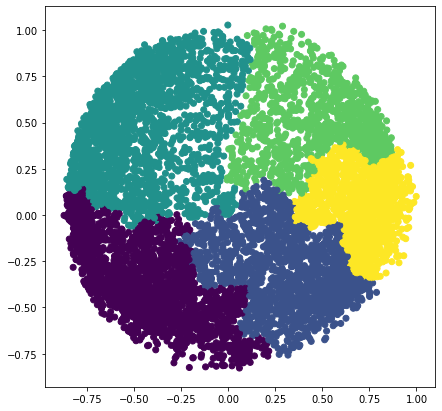

In [94]:
plt.figure(figsize = (7,7))
plt.scatter(X_principal['P1'], X_principal['P2'], c = y_pred5)
plt.show()

In [96]:
ac6 = AgglomerativeClustering(n_clusters = 6)

In [97]:
y_pred6 = ac6.fit_predict(X_principal)

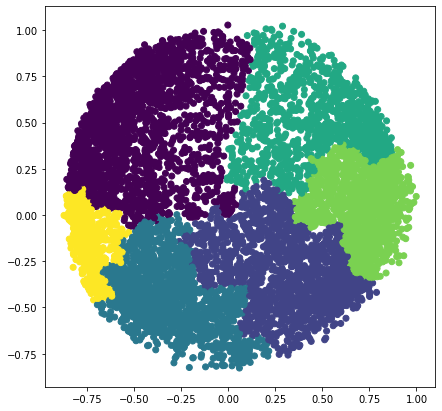

In [98]:
plt.figure(figsize = (7,7))
plt.scatter(X_principal['P1'], X_principal['P2'], c = y_pred6)
plt.show()

## Silhouette Score
Supervised alogritms have metics to check their goodness of fit like accuracy, r-square value, sensitivity etc.
* But how to calculate to measure the accuracy or goodness of our clustering technique --> So, Silhouetee Score is used

Silhouetee score is a metric used to calcualte the goodness of clustering technique.Its value ranges from -1 to 1

* 1: Means the clusters are well apart from each other and alearly distinguished
* 0: Means clusters are indifferent(i. e. the distance between clusters is not significant)
* -1: Means clusters are assigned in the wrong way

In [101]:
from sklearn.metrics import silhouette_score

In [102]:
k = [2,3,4,5,6]
sil_scores = []

In [103]:
sil_scores.append(silhouette_score(X_principal, y_pred2))
sil_scores.append(silhouette_score(X_principal, y_pred3))
sil_scores.append(silhouette_score(X_principal, y_pred4))
sil_scores.append(silhouette_score(X_principal, y_pred5))
sil_scores.append(silhouette_score(X_principal, y_pred6))

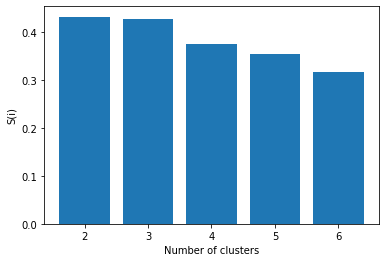

In [106]:
# Plotting a bar graph to compare the results
plt.bar(k, sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('S(i)')
plt.show()

Based on bar graph, the optimal number of clusters for the given data and clustering technique is 2

In [108]:
import scipy.cluster.hierarchy  as shc

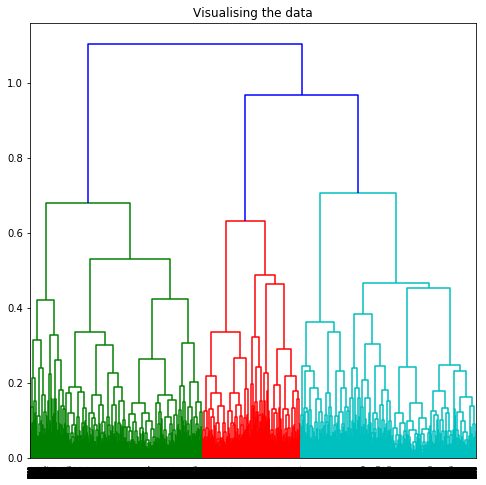

In [111]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method='average' )))  #method ='ward'